# Time series model-AR on financial data
Autoregressive Model (AR) predicts future behavior based on past behaviorl.An AR(p) model is an autoregressive model where specific lagged values of $y_t$ are used as predictor variables.

### Linear regression 

The representation is a linear equation that combines a specific set of input values (x) the solution to which is the predicted output for that set of input values (y). As such, both the input values (x) and the output value are numeric. The euqation can be written as $y=X\beta+\theta$, where X is a matrix, $\beta$ is a vector of unknown parameters to be estimated, and $\theta$ is the error vector.

Types of linear regression:
* Simple linear regression (a single input variable(x))

$y=\alpha_0 +\beta_1x$ where $\alpha$ = y-intercept, $\beta$=slope

* Multiple linear regression (multiple input variables)

$\hat{y}=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p$

* Ordinary Least Squares Linear Regression (minimize the sum of the squared residuals) 

$\hat{y}=X\hat{\beta}$, where $\beta=X(X^TX)^{-1}X^Ty$

The following packages will be used in this project:
*   matplotlib.pyplot: [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html)
*   numpy: [documentation](https://numpy.org/devdocs/)
*   pandas: [documentation](https://pandas.pydata.org/docs/)
*   plotly.express: [documentation](https://plotly.com/python/plotly-express/)



In [53]:
#we import the package first 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader as web
import plotly.express as px

## Data information
The dataset is selected from yahoo fiance[link](https://finance.yahoo.com/quote/NKE?p=NKE&.tsrc=fin-srch) and the dataset is about stock price of NIKE company start from 2021-01-01 to 2021-09-07. 

In [54]:
data = web.DataReader('NKE',
                    'yahoo',
                     start = '2021-01-01',
                      end = '2021-09-07'
                     )

In [55]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-04,142.970001,138.320007,142.850006,140.100006,6178517.0,139.054413
2021-01-05,141.660004,138.600006,138.600006,141.229996,4163149.0,140.175949
2021-01-06,143.569901,139.529999,141.250000,142.350006,6072939.0,141.287598
2021-01-07,145.639999,143.000000,143.199997,144.949997,5256940.0,143.868195
2021-01-08,146.820007,144.900101,145.550003,146.350006,3950741.0,145.257751


We select the first 30 rows for close price as training data.  

In [56]:
train_df = pd.DataFrame(data['Close'].iloc[:30])
train_df.head()

,Close
Date,
2021-01-04,140.100006
2021-01-05,141.229996
2021-01-06,142.350006
2021-01-07,144.949997
2021-01-08,146.350006


## Time series plot
We plot time series plot by using the training data. 

Text(0.5, 1.0, 'Nike Daily Price for 2021 January')

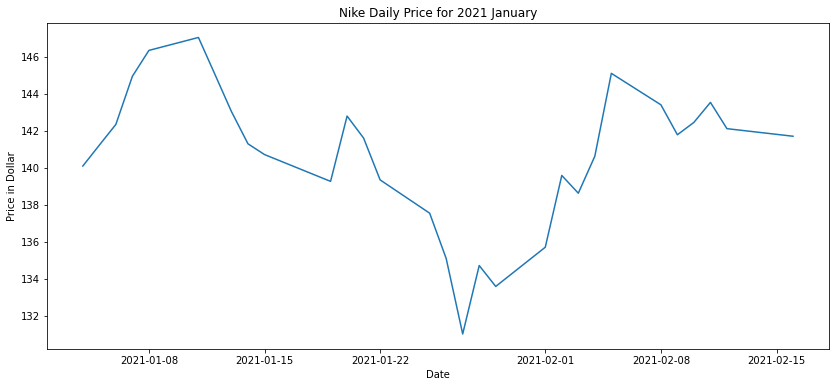

In [57]:
plt.figure(figsize=(14,6))
plt.plot(train_df['Close'])
plt.xlabel('Date')
plt.ylabel('Price in Dollar')
plt.title('Nike Daily Price for 2021 January')

## Time series plot for all variables
We plot the time series graph for all variables: High price, Low price, Close price, and Open price. 

In [59]:
pip install -U kaleido

     |████████████████████████████████| 85.2 MB 175 kB/s eta 0:00:011     |█████▍                          | 14.4 MB 6.7 MB/s eta 0:00:11     |████████▏                       | 21.7 MB 11.3 MB/s eta 0:00:06     |█████████▉                      | 26.1 MB 11.3 MB/s eta 0:00:06
Note: you may need to restart the kernel to use updated packages.


In [62]:
import kaleido

In [64]:
fig = px.line(data,y=['High','Low','Close','Open'],
        title='Bitcoin Price Comparision for High, Low, Close, and Open',
        labels={'value':'Price'})
fig.show('png')

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


## Lag
Lags are where results from one time period affect following periods.
Next we creat lag1. Move the column data one step below.  

In [15]:
train_df['lag_1'] = train_df['Close'].shift(1) 
train_df.head()

,Close,lag_1
Date,,
2021-01-04,140.100006,NaN
2021-01-05,141.229996,140.100006
2021-01-06,142.350006,141.229996
2021-01-07,144.949997,142.350006
2021-01-08,146.350006,144.949997


Then we creat lag 2 to lag 7 append them into dataset. 

In [16]:
for i in range(2,8):
    train_df[f'lag_{i}'] = train_df['Close'].shift(i)
train_df.head(8)

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2021-01-04,140.100006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,141.229996,140.100006,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-06,142.350006,141.229996,140.100006,NaN,NaN,NaN,NaN,NaN
2021-01-07,144.949997,142.350006,141.229996,140.100006,NaN,NaN,NaN,NaN
2021-01-08,146.350006,144.949997,142.350006,141.229996,140.100006,NaN,NaN,NaN
2021-01-11,147.050003,146.350006,144.949997,142.350006,141.229996,140.100006,NaN,NaN
2021-01-12,145.050003,147.050003,146.350006,144.949997,142.350006,141.229996,140.100006,NaN
2021-01-13,143.039993,145.050003,147.050003,146.350006,144.949997,142.350006,141.229996,140.100006


Since there are many NaN value, we need to drop NaN in dataset. 

In [17]:
train_df = train_df.dropna()
train_df.head()

,Close,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2021-01-13,143.039993,145.050003,147.050003,146.350006,144.949997,142.350006,141.229996,140.100006
2021-01-14,141.300003,143.039993,145.050003,147.050003,146.350006,144.949997,142.350006,141.229996
2021-01-15,140.720001,141.300003,143.039993,145.050003,147.050003,146.350006,144.949997,142.350006
2021-01-19,139.270004,140.720001,141.300003,143.039993,145.050003,147.050003,146.350006,144.949997
2021-01-20,142.800003,139.270004,140.720001,141.300003,143.039993,145.050003,147.050003,146.350006


In order to minimize the sum of the squared residuals, we use ordinary least squares
Based on the general function: 

$\hat{y}=X\hat{\beta}$, where $\beta=X(X^TX)^{-1}X^Ty$

We set $\hat{y}$ and $\hat{w}$ by using the following equations. 

$\hat{y}=X\hat{w}$

$\hat{w}=(X^TX)^{-1}X^TY$




In [19]:
cols = [f'lag_{i}' for i in range(1,8)]
X=train_df[cols].to_numpy()
y=train_df['Close'].to_numpy()
w_hat = np.linalg.inv(X.T @ X) @ X.T@y

In [20]:
train_df['predictions'] = X @ w_hat
train_df['predictions'].head()

Date
2021-01-13    144.392980
2021-01-14    141.829219
2021-01-15    140.393844
2021-01-19    140.511933
2021-01-20    139.843819
Name: predictions, dtype: float64

## Visualized prediction value
We plot the true close value and prediction value. 


In [38]:
px.line(train_df,y=['Close','predictions'],
        title='Prediction vs True NKE Price',
       labels={'value':'Price'})

Since the plots didn't capture the true value, we introduce bias into our dataset. 
We set bias as lag which we set before. 

In [23]:
train_df['ones'] = np.ones(len(train_df['Close']))
cols = [f'lag_{i}' for i in range(1,8)]
cols.append('ones')
print(cols)

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'ones']


Create a X matrix with lag and one, we set it as X_bias. 

In [40]:
X_bias = train_df[cols].to_numpy()

Repeat the previous operation and set it as w_hat_bias. 

In [25]:
w_hat_bias = np.linalg.inv(X_bias.T @ X_bias)@ X_bias.T@y

We can calculate the predictions with bias easily and the plot the close price, prediction and prediction with bias.  

In [26]:
train_df['predictions_with_bias'] = X_bias @ w_hat_bias

In [27]:
px.line(train_df,y=['Close','predictions','predictions_with_bias'],
       title='True NKE Price vs Prediction without bias vs Prediction with bias',
       labels={'value':'Price'})

## Loss
We want to know the loss, so we use root mean square error(RMSE) for prediction and prediction with bias. The RMSE formula is:

$RMSE=\sqrt{(\frac{1}{n} \sum_{i = 1}^n (y_i-x_i)^2)}$


In [28]:
y_hat1 = train_df['predictions'].to_numpy()
y_hat2 = train_df['predictions_with_bias'].to_numpy()

In [30]:
def RMSE(labels,predictions):
    return np.sqrt((labels - predictions)@(labels-predictions))
print(f'In-Sample RMSE without bias = {RMSE(y,y_hat1)}\n')
print(f'In-Sample RMSE with bias = {RMSE(y,y_hat2)}')

In-Sample RMSE without bias = 9.593710807010758

In-Sample RMSE with bias = 8.39613281676541


In-sample RMSE with bias is smaller than in-sample RMSE without bias which is what we expected  

In [44]:
px.line(data,y=['Close'])


We introduce log close to stable the variation. 

In [32]:
data['log_Close'] = np.log(data['Close'])
px.line(data,y='log_Close')

# Reference
Jason,Brownlee, Linear Regression for Machine Learning, March 25,2016. https://machinelearningmastery.com/linear-regression-for-machine-learning/

Yahoo Finance, NIKE,Inc.2021 https://finance.yahoo.com/quote/NKE?p=NKE&.tsrc=fin-srch